# Python Block Course
# Assignment 5: Final assignment

Marc Luettecke, Anna Bahss

Winter Term 2020 / 2021

In this fifth assignment we bring together all the things you have learned so far for a final project-like assignment. It will be longer and less instructed than previous assignments. You can score up to 5 points in this assignment. Please submit your solutions by sending it to **marc.luettecke@subsequent.ai** or **anna.bahss@uni-konstanz.de** (ideally both). Please include "**Python Blockkurs 2020 Assignment 5**" in the subject line of the email. The deadline for submission is on **Saturday, October 31, 23:59**, everything submitted after will automatically receive a grade of 0/5. For this assignment, the points will not be split by parts, but by the overall impression of your effort and the grasp of the concepts. Very roughly the grading will cover the following points:
- clean documentation of code
- modularization with classes and logical separation of code (are repeating tasks defined in functions? Do the classes inherit properties appropriately? etc.)
- clever usage of elements taught in the class (which data structures are used? Numpy arrays? panda dataframes? lists? dictionaries?)
- how interestingly do YOU tell the story of this mini project?
- do you manage to convey your ideas to an uninformed party via visualization or interesting statistics? (remember: in this special case, we care about the code you wrote, but most people mainly look at what you achieved with that, so tell a captivating and coherent story. Also, tell us what surprised you or what might not make sense).

**Notice: There's nothing new under the sun. Some of these problems are inspired by problems already existing out there. We can't avoid you copying code off the web, but know that 1. it is surprisingly easy to spot, if somebody uses techniques not introduced or referenced in the assignments yet, 2. you are missing out on actually understanding how to solve the problems with the tools (or at least hints) provided. Do yourself a favor and don't plagiarize.**

## 5.0 Set up

In [136]:
# add all imports into this cell and don't forget to re-run it if you added new content
import requests
from bs4 import BeautifulSoup
from omdbapi.movie_search import GetMovie
import re
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# potential installations, you can run any jupyter cell as a terminal command by appending ! at the beginning
!pip install omdbapi

In [3]:
# global constants (variables that do not change throughout the exercise) come here. Programming convention types them in all capital letters
API = 'a51392c6'

## 5.1 Structure your project
Generally, you know roughly what kind of task you will accomplish. In this assignment you can expect to query the data of a datasource, run some analyses and convey your results. Define appropriate classes, that we can populate more later. This approach will allow you to structure your ideas into logical steps and might determine which data structure you will use for successive tasks. Maybe a parent class 'Data' might prove useful for shared properties between the design steps?

In [122]:
# your code for the class definitions - leave as much empty and come back to it later, once you recognize re-occuring taks that might be better kept in a method, or variables that prove best held as properties of classes
class Data:
    def __init__(self, title_list):
        self.title_list = title_list

class DataProcessor(Data):
    def __init__(self, title_list, API: str):
        self.API = API
        self.base_url = f'http://www.omdbapi.com/?apikey={self.API}&'
        self.movie_info_list = []
        self.genre_list = []
        self.rating_list = []
        Data.__init__(self, title_list)

        for title in self.title_list:
            movie_info = self.get_movie(f't={title}')
            if movie_info['Response'] == 'True':
                self.movie_info_list.append(movie_info)

        self.genre_list = self.get_genre_info()
        self.rating_list = self.get_rating_info()
        self.genre_count = self.count_genre()
        self.avg_genre_rate = self.cal_avg_rate_for_each_genre()
    
    def get_movie(self, query: str):
        r = requests.get(self.base_url + query)
        return r.json()

    def get_genre_info(self):
        g_list = []
        for info in self.movie_info_list:
            g_list.append(info['Genre'])
        return g_list

    def get_rating_info(self):
        r_list = []
        for info in self.movie_info_list:
            r_list.append(info['imdbRating'])
        return r_list
    
    def count_genre(self):
        genre_count = {}
        for g_collect in self.genre_list:
            if ',' in g_collect:
                g_items = g_collect.split(',')
                for item in g_items:
                    if not item in genre_count.keys():
                        genre_count[item] = 1
                    else:
                        genre_count[item] += 1
        return genre_count


    def cal_avg_rate_for_each_genre(self):
        genre_rate = {}
        for item in self.movie_info_list:
            genre_collect = item['Genre']
            if ',' in genre_collect:
                g_items = genre_collect.split(',')
                for g_item in g_items:
                    if not g_item in genre_rate.keys():
                        genre_rate[g_item] = [float(item['imdbRating'])]
                    else:
                        genre_rate[g_item].append(float(item['imdbRating']))
        # print(genre_rate)
        avg_genre_rate = {}
        for g_k in genre_rate.keys():
            rate_list = genre_rate[g_k]
            sum_r = 0.0
            for r in rate_list:
                sum_r += r
            avg_r = sum_r/len(rate_list)
            avg_genre_rate[g_k] = avg_r
        # print(avg_genre_rate)
        return avg_genre_rate

## 5.2 Get your data
For this assignment,  you will tell us a story with the OMDb API, a well-maintained movie database API. All information on how to retrieve information can be found [here](http://www.omdbapi.com/). Hint: Either use the request module as taught on day 4 and play around with the links or install and work directly with the OMdB API package in python (read the instructions carefully for which version to install depending on your Python version: https://pypi.org/project/omdbapi/).

Either way you will need an API key. Use ours: **194c7b68** or get your own under: http://www.omdbapi.com/apikey.aspx **IMPORTANT: Do not make excessive calls, via an infinite loop etc, because then the API key will be blocked for everybody. This key allows for 100,000 requests a day, so do not be silly, please**.

Feel free to show us some appropriate work of how you queried and retrieved data. The website offers some good advice on how the URL determines the data you get out. Maybe even define a function to query data?

In [72]:
# Get the title list of TOP 50 most popular TV series during 2009-01-01 - 2009-12-31
rq_0 = requests.get('https://www.imdb.com/search/title/?title_type=tv_series&release_date=2009-01-01,2009-12-31&num_votes=2000,')
html_0 = rq_0.text
soup_0 = BeautifulSoup(html_0, 'html.parser')
rq_1 = requests.get('https://www.imdb.com/search/title/?title_type=tv_series&release_date=2019-01-01,2019-12-31&num_votes=2000,')
html_1 = rq_1.text
soup_1 = BeautifulSoup(html_1, 'html.parser')

In [123]:
title_list_09 = []
pattern = re.compile('/title/')
all_title = soup_0.findAll(name='a')
for title in all_title:
    match_index = re.match(pattern, str(title.get('href')))
    if match_index != None :
        if len(title.text)>2:
            title_list_09.append(title.text)

title_list_19 = []
pattern = re.compile('/title/')
all_title = soup_1.findAll(name='a')
for title in all_title:
    match_index = re.match(pattern, str(title.get('href')))
    if match_index != None :
        if len(title.text)>2:
            title_list_19.append(title.text)


# code to familiarize with the OMDb API
# Option 1: directly interact with website (here with class example)
dp_0 = DataProcessor(title_list_09, API=API)
dp_1 = DataProcessor(title_list_19, API=API)
print(dp_0.avg_genre_rate)
# print(dp_0.genre_list)
# print(dp_0.rating_list)

# # Option 2: API package
# movie = GetMovie(title='avengers', api_key=API)
# print(movie.get_all_data())

nd the meaning of inner beauty.', 'Language': 'English', 'Country': 'USA', 'Awards': '8 wins & 12 nominations.', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjIxMzUyOTk4MV5BMl5BanBnXkFtZTcwMjEwMDQyMw@@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.4/10'}], 'Metascore': 'N/A', 'imdbRating': '7.4', 'imdbVotes': '17,867', 'imdbID': 'tt1280822', 'Type': 'series', 'totalSeasons': '6', 'Response': 'True'}, {'Title': 'Dollhouse', 'Year': '2009–2010', 'Rated': 'TV-14', 'Released': '13 Feb 2009', 'Runtime': '44 min', 'Genre': 'Drama, Mystery, Sci-Fi, Thriller', 'Director': 'N/A', 'Writer': 'Joss Whedon', 'Actors': 'Eliza Dushku, Harry Lennix, Fran Kranz, Tahmoh Penikett', 'Plot': 'A futuristic laboratory has erased the identities of lost young people, and now imprints them with the temporary identities they need to fulfill assignments for clients.', 'Language': 'English', 'Country': 'USA', 'Awards': '5 nominations.', 'Poster': 'https://m.media-amazon.com/i

In [127]:
print(len(dp_0.avg_genre_rate))
print(len(dp_1.avg_genre_rate))
# Since the genre categories are not identical, we need to fill in the miss value

28
24


In [138]:
# Fill in the miss value
union_genre = list(set(dp_0.avg_genre_rate.keys()) | set(dp_1.avg_genre_rate.keys()))
new_dp_0_avg_genre_rate = {}
new_dp_1_avg_genre_rate = {}
for u_g in union_genre:
    if not u_g in dp_0.avg_genre_rate.keys():
        new_dp_0_avg_genre_rate[u_g] = 0
    else:
        new_dp_0_avg_genre_rate[u_g] = round(dp_0.avg_genre_rate[u_g], 1)
for u_g in union_genre:
    if not u_g in dp_1.avg_genre_rate.keys():
        new_dp_1_avg_genre_rate[u_g] = 0
    else:
        new_dp_1_avg_genre_rate[u_g] = round(dp_1.avg_genre_rate[u_g], 1)
print(new_dp_0_avg_genre_rate)
print(new_dp_1_avg_genre_rate)

{'Short': 7.4, ' Musical': 6.5, 'Family': 7.6, ' Mystery': 7.9, 'Horror': 0, ' Drama': 7.5, 'Action': 6.7, ' Adventure': 7.0, ' Fantasy': 7.7, 'Animation': 7.7, 'Documentary': 8.1, ' Short': 0, 'Game-Show': 8.5, ' Comedy': 7.6, ' Family': 7.0, 'Drama': 7.6, ' Music': 6.7, ' Romance': 7.2, ' Crime': 7.7, ' History': 8.3, ' Sci-Fi': 7.7, 'Biography': 0, ' Horror': 7.6, ' Sport': 8.2, 'Crime': 8.0, ' Biography': 8.8, ' Thriller': 7.9, 'Adventure': 7.5, ' Action': 8.5, ' Reality-TV': 6.6, 'Comedy': 7.5}
{'Short': 7.7, ' Musical': 0, 'Family': 0, ' Mystery': 7.5, 'Horror': 4.9, ' Drama': 7.3, 'Action': 7.3, ' Adventure': 7.4, ' Fantasy': 7.9, 'Animation': 8.6, 'Documentary': 0, ' Short': 8.5, 'Game-Show': 0, ' Comedy': 8.0, ' Family': 7.6, 'Drama': 7.5, ' Music': 7.7, ' Romance': 7.8, ' Crime': 7.5, ' History': 0, ' Sci-Fi': 7.1, 'Biography': 8.0, ' Horror': 7.7, ' Sport': 8.2, 'Crime': 7.6, ' Biography': 0, ' Thriller': 7.1, 'Adventure': 6.4, ' Action': 8.6, ' Reality-TV': 0, 'Comedy': 7.9

## 5.3 Define project scope
This is the part where your creativity comes into play. Define some simple question. This can relate to a statistical question (regressing a variables on another one), some explorative data analysis (find an interesting aspect of the data and visualize it) or even consult outside information additional to the movie data and couple it for exciting insights. Make sure to explain your project carefully and lay out what you are trying to achieve in this part.

Make a comparison on prefrence on genre of top 50 popular TV series between year 2009 and year 2019

## 5.4 Visualize your results
Please find an appropriate way to tell your story. How are the names of movies related to Oscar winners? Show us a wordcloud. What is the distribution of males vs females in movies over the last 10 years? Maybe some way of well-defined barchart might come to mind. This section will extend what you have learned so far, so do not hesitate to find the most suitable way to tell your unique story.

**Important: A thin line exists between using outside packages to make your life easier, and copy-pasting code without purpose. We will be less impressed with a entirely copied neural network that you have not understood that predicts box office prices well, than with a well-defined smaller problem, where you get to showcase what you have actually learned in this week.**

Please follow these guidelines that will help you improve your visualization (and show that you have understood the contents introduced in "Introduction to Data Visualization in Python"):

- If you are implementing different graphs be sure to use the subplot() command correctly
- Please use at least one annotation
- Customize the axis in an appropriate way
- Make use of the seaborn data visualization library (find interesting visualization ideas and code here: https://seaborn.pydata.org/examples/index.html)
- Implement color to enhance your visualization

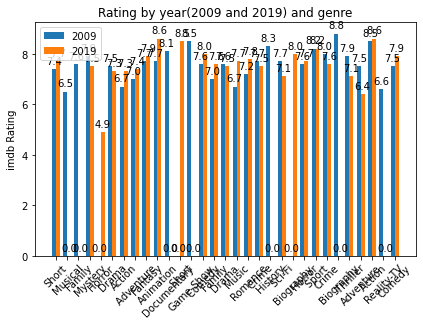

<Figure size 4320x72 with 0 Axes>

In [147]:

labels = union_genre
rate_09 = new_dp_0_avg_genre_rate.values()
rate_19 = new_dp_1_avg_genre_rate.values()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, rate_09, width, label='2009')
rects2 = ax.bar(x + width/2, rate_19, width, label='2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('imdb Rating')
ax.set_title('Rating by year(2009 and 2019) and genre')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.xticks(rotation = 45)
plt.figure(figsize=(60,1))
plt.show()